<a href="https://colab.research.google.com/github/Raagulbharatwaj/BERT/blob/main/VisualBERT_and_Hubertipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VisualBERT a multimodal transformer**

In [ ]:
!pip install transformers

## What is multimodal learning?

* Traditionally AI systems are unimodal, as they are designed to perform a particular task such as image processing and speech recognition. 
* Given a single input such as an image or speech, the AI system is able to identify corresponding images or words
* Multimodal systems can handle multiple form of inputsw at the same time
* Some forms of multimodal learning includes:
    
    1. Image + Text
    2. Image + Audio
    3. Text  + Audio
    4. Video + Text 

## **How to process multimodal tokens?**

Let us consider an image and a sentence that describes the image like given below 

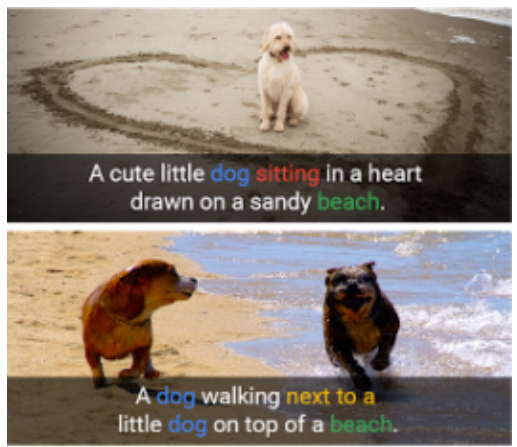

How can a model understand such things isn't it a little bit complex task considering it should generate text from an image.

This is exactly what multimodal learning is.
Here our input and output are of different modes

* Input : Image Modality

* Output: Text  Modality

Now certain questions will arise generally

* How to make a model understand multiple types of input?

* How exactly should we give the training data to the model?

* What is the gaurentee that our model will perform in a way we expect it to perform?



Let us imagine that we have input embeddings of the image similar to how we obtain input embeddings for text.

i.e,

Token Embedding + Segment Embedding + Position Embedding


Now that we have input embeddings let us understand how it is given to the transformer

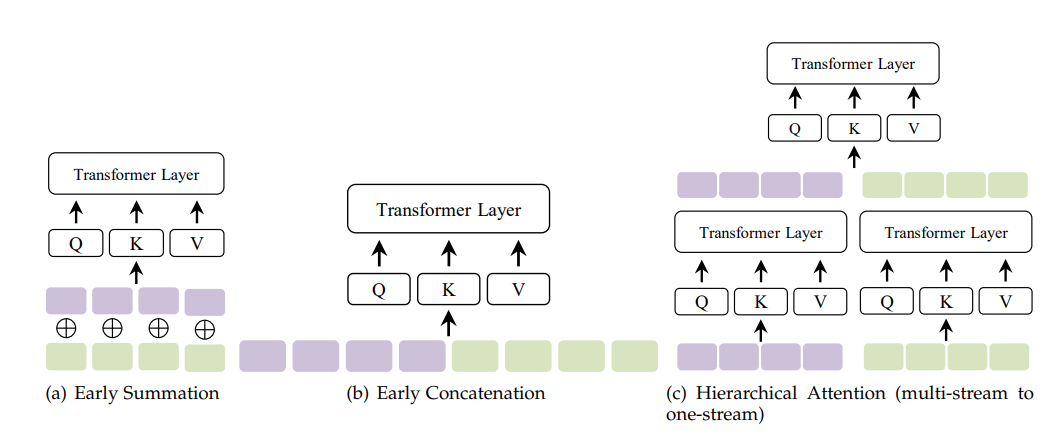

As we are clear how to feed the input to the model let us understang how the model understands crossmodal relationships with cross attention



## **Cross attention**


Cross attention helps us to understand how much each token of one mode is associated with the other.

A simple way to look at cross attention is just excahnging the Query matrices accross different modes of data.

cross attention tells us how one mode is associated with the other

now you can understand how powerfull representations are!

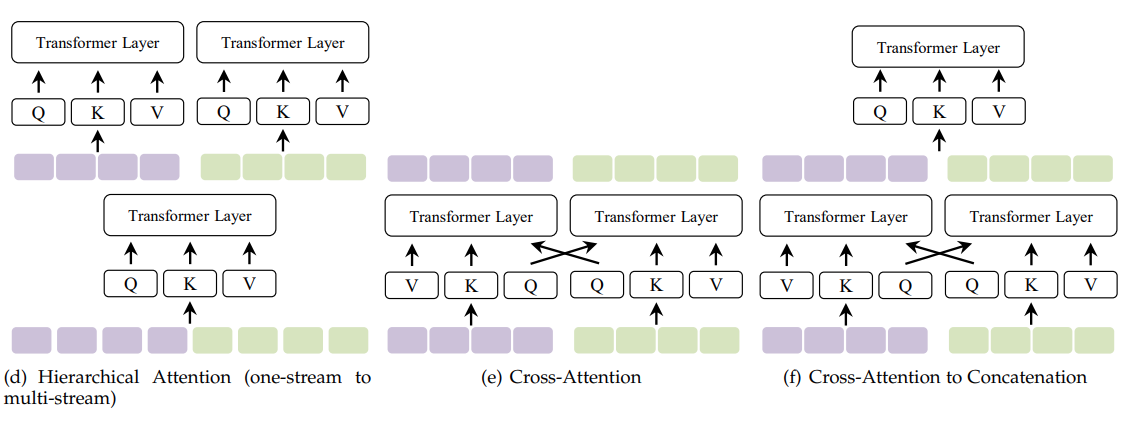

## **How to obtain image embeddings?**

Steps to obtain image embeddings: 
1. Split an image into patches

2. Flatten the patches

3. Produce lower-dimensional linear embeddings from the flattened patches

4. Add positional embeddings

5. Feed the sequence as an input to a standard transformer encoder(BERT)

# **Working with ViualBERT**

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

In [ ]:
from transformers import ViltProcessor, ViltModel
from PIL import Image
import requests

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "hello world"

In [ ]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")
model = ViltModel.from_pretrained("dandelin/vilt-b32-mlm")

In [ ]:
inputs = processor(image, text, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state